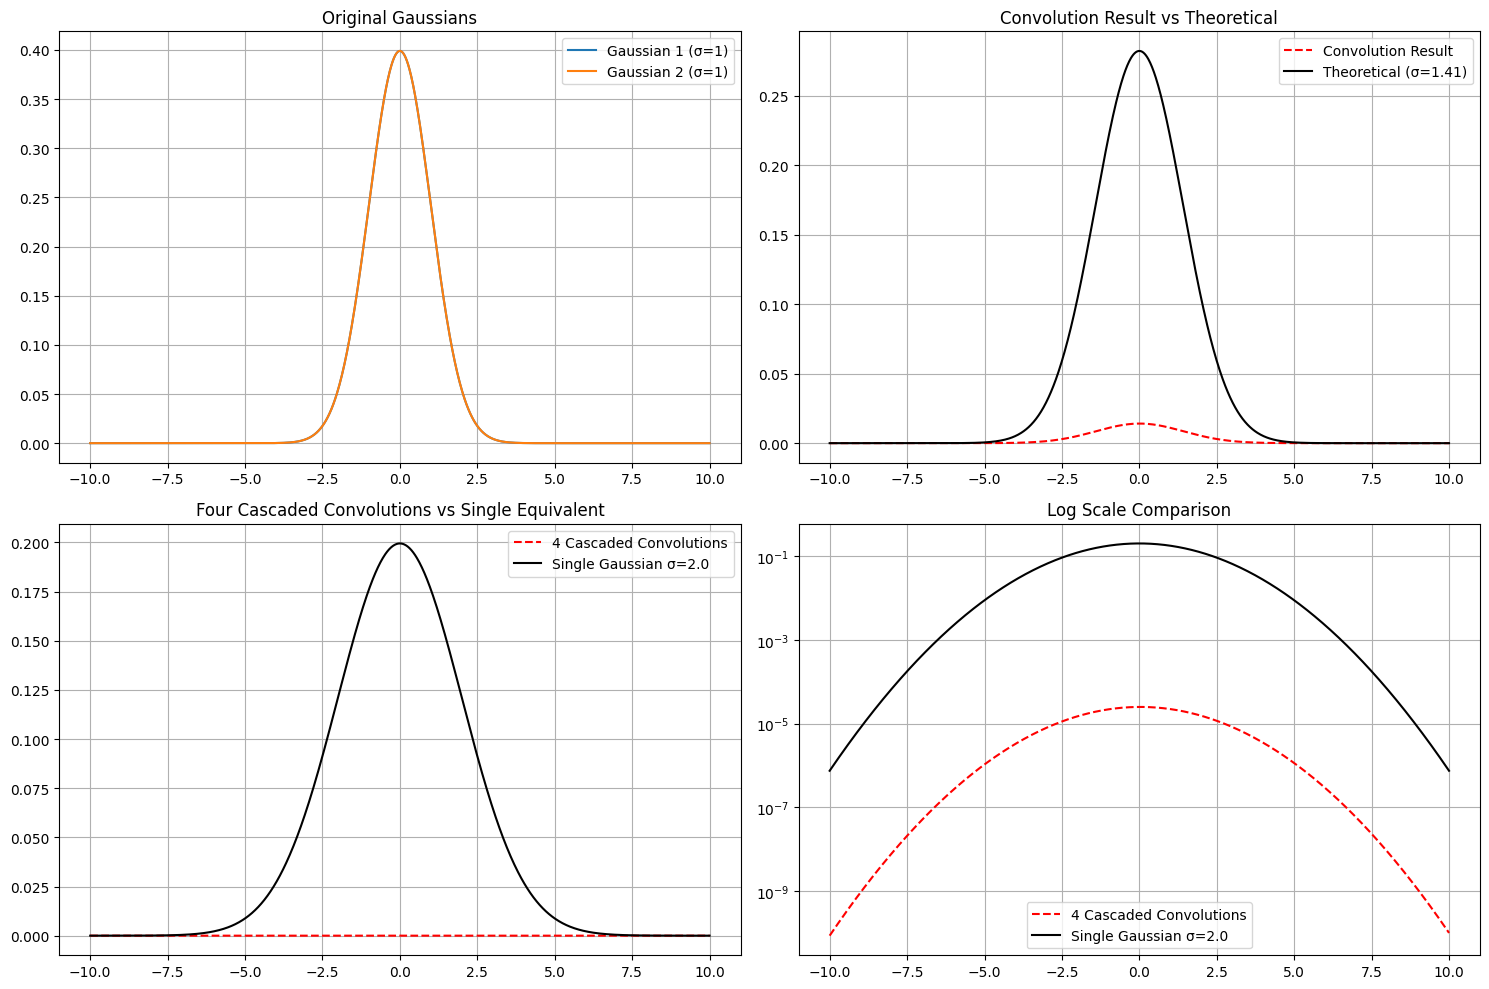

Analytical Verification:
Individual σ values: [1, 1, 1, 1]
Theoretical combined σ: 2.0

Width comparison at different heights:
At height 0.1:


TypeError: unsupported format string passed to NoneType.__format__

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

def gaussian(x, sigma):
    """Create 1D Gaussian"""
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-x**2/(2*sigma**2))

# Create x-axis
x = np.linspace(-10, 10, 1000)

# Create individual Gaussians
sigma1 = 1
sigma2 = 1
g1 = gaussian(x, sigma1)
g2 = gaussian(x, sigma2)

# Convolve Gaussians
conv_result = convolve(g1, g2, mode='same')/len(x)

# Create theoretical combined Gaussian
sigma_combined = np.sqrt(sigma1**2 + sigma2**2)
g_combined = gaussian(x, sigma_combined)

# Plot results
plt.figure(figsize=(15, 10))

# Original Gaussians
plt.subplot(221)
plt.plot(x, g1, label=f'Gaussian 1 (σ={sigma1})')
plt.plot(x, g2, label=f'Gaussian 2 (σ={sigma2})')
plt.title('Original Gaussians')
plt.legend()
plt.grid(True)

# Convolution result vs theoretical
plt.subplot(222)
plt.plot(x, conv_result, 'r--', label='Convolution Result')
plt.plot(x, g_combined, 'k-', label=f'Theoretical (σ={sigma_combined:.2f})')
plt.title('Convolution Result vs Theoretical')
plt.legend()
plt.grid(True)

# Four cascaded Gaussians
sigmas = [1, 1, 1, 1]
g_cascade = gaussian(x, 1)
for i in range(3):
    g_cascade = convolve(g_cascade, gaussian(x, 1), mode='same')/len(x)

sigma_final = np.sqrt(sum([s**2 for s in sigmas]))
g_final = gaussian(x, sigma_final)

plt.subplot(223)
plt.plot(x, g_cascade, 'r--', label='4 Cascaded Convolutions')
plt.plot(x, g_final, 'k-', label=f'Single Gaussian σ={sigma_final}')
plt.title('Four Cascaded Convolutions vs Single Equivalent')
plt.legend()
plt.grid(True)

# Log plot to show tails
plt.subplot(224)
plt.semilogy(x, g_cascade, 'r--', label='4 Cascaded Convolutions')
plt.semilogy(x, g_final, 'k-', label=f'Single Gaussian σ={sigma_final}')
plt.title('Log Scale Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print analytical verification
print("Analytical Verification:")
print(f"Individual σ values: {sigmas}")
print(f"Theoretical combined σ: {sigma_final}")

# Calculate width at various heights
def width_at_height(g, x, height):
    above_height = g > height
    if np.sum(above_height) > 0:
        left = x[above_height][0]
        right = x[above_height][-1]
        return right - left
    return None

heights = [0.1, 0.01, 0.001]
print("\nWidth comparison at different heights:")
for h in heights:
    w1 = width_at_height(g_cascade, x, h)
    w2 = width_at_height(g_final, x, h)
    print(f"At height {h}:")
    print(f"Cascaded width: {w1:.3f}")
    print(f"Theoretical width: {w2:.3f}")